                                     PENDULO NO AMORTIGUADO
                                     

                 considere un péndulo donde no hay fuerzas de fricción actuando sobre 
                 el sistema:
                 
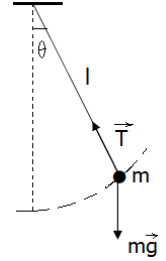

donde:

$$T = \frac{1}{2} {mv^2} = \frac{1}{2} {ml^2} \dot{\theta}^2 $$

$$U = mgl(1-cos{\theta})$$

$$L = T - U = \frac{1}{2} {ml^2} \dot{\theta}^2 - mgl(1-cos{\theta})$$

                 puesto que en este caso solo actúan fuerzas conservativas tenemos:
                 
$$\frac{d}{dt} \frac{dL}{d\dot{\theta}} - \frac{dL}{d{\theta}} = 0$$

$$\ddot{\theta} +  \frac{g}{l} sen({\theta}) = 0$$

                 de esta última ecuación vemos que un péndulo no es necesariamente un oscilador armónico.
                 
                 pero si tuviéramos oscilaciones de pequeña amplitud, sucede que podemos hacer la siguiente aproximación:
                 
$$\ sen({\theta}) --> {\theta}$$

                 y sólo así tendríamos un oscilador armónico.
                 
                 el cual es siempre representado por una ecuación de  la forma :
                 
$$\ddot{\theta} +  \frac{g}{l} {\theta} = 0$$

                 Implementamos aquí el método RK4 para resolver la ecuación diferencial
                 que describe el movimiento del pendulo.
                 veamos:

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


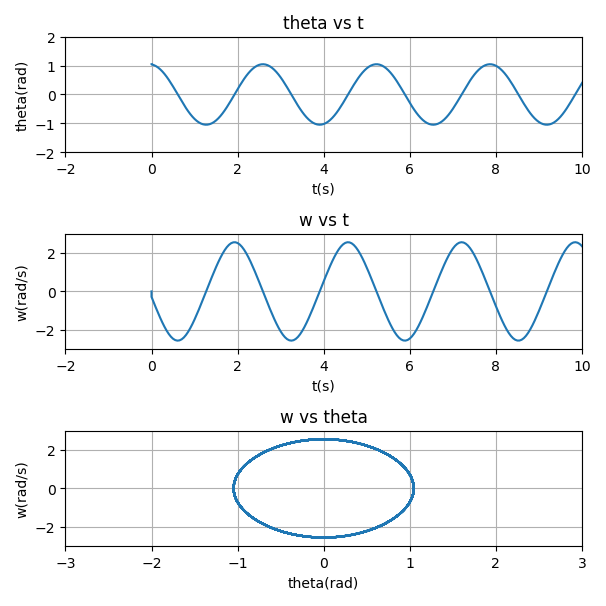

In [2]:
from PIL import Image
import matplotlib.pyplot as grf
from matplotlib import rcParams
import numpy as np
from math import*
from math import sin,cos,pi

n = 1000
t = np.zeros(n+1)
theta = np.zeros(n+1)
w = np.zeros(n+1)
r = 1.5 #AQUÍ TOMAMOS l = r , para no confundir con el metodo RK4
x = [] ; y = []
to = 0 ; tf = 50 ; h = (tf - to)/n

t[0] = to
for i in range(n):
    t[i+1] = to + h*i
    
theta[0] = 60*(pi/180) 

w[0] = 0

for i in range(n):
    k1 = h*w[i]
    l1 = h*(-9.8/r)*sin(theta[i]) 
    k2 =  h*(w[i] + 0.5*l1)
    l2 = h*(-9.8/r)*sin(theta[i] + 0.5*k1) 
    k3 = h*(w[i] + 0.5*l2)
    l3 = h*(-9.8/r)*sin(theta[i] + 0.5*k2) 
    k4 = h*(w[i] + l3)
    l4 = h*(-9.8/r)*sin(theta[i] + k3) 
    
    w[i+1] = w[i] + (l1 + 2*l2 + 2*l3 + l4)/6
    theta[i+1] = theta[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    x.append(r*sin(theta[i]))
    y.append(-r*cos(theta[i]))
    
    
fig, ax = grf.subplots(nrows=3, figsize=(6, 6))

grf.subplot(311)
grf.title("theta vs t")
grf.plot(t,theta)
grf.xlim(-2,10)
grf.ylim(-2,2)
grf.xlabel("t(s)")
grf.ylabel("theta(rad)")
grf.grid()

grf.subplot(312)
grf.title("w vs t")
grf.plot(t,w)
grf.xlim(-2,10)
grf.ylim(-3,3)
grf.xlabel("t(s)")
grf.ylabel("w(rad/s)")
grf.grid()

grf.subplot(313)
grf.title("w vs theta")
grf.plot(theta,w)
grf.xlim(-3,3)
grf.ylim(-3,3)
grf.xlabel("theta(rad)")
grf.ylabel("w(rad/s)")
grf.grid()

grf.tight_layout()